# Analysis of Sample Data

In [2]:
import sys
sys.path.append('/home/g/code/ds/sentiment')

from collections import Counter

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sentiment_analysis.database import engine


green = '#008f41'
plt.style.use('dark_background')

df = pd.read_sql_table('game_review', engine)
df.head()

,id,user_id,game_id,rating,comment
0,1,25308,37111,9.0,++++ Thematic +++ Bluff - Many randomness I ...
1,2,54313,12,8.0,"""well, that ugly artwork certainly helped imme..."
2,3,38165,50,8.0,LOVE this game! If only the GF would play it ...
3,4,56936,1198,5.0,"SET is a good game, in small doses (in my case..."
4,5,47675,164153,6.0,"So much better than Descent. Better theme, imp..."


# Rating Column Analysis

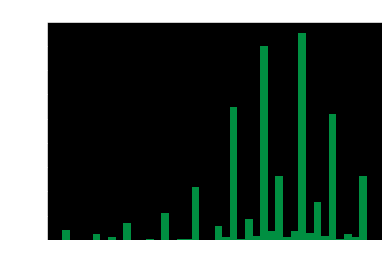

In [2]:
num_bins = 40

plt.hist(df.rating, num_bins, facecolor=green)

plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

plt.show()

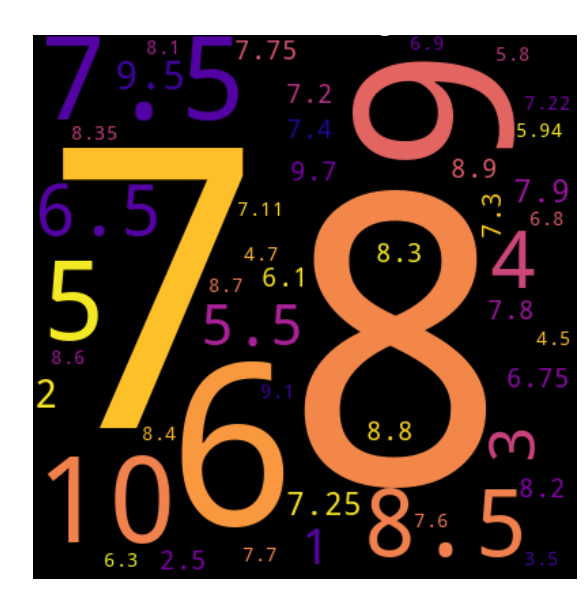

In [3]:
wc = WordCloud(width=400, height=400,colormap='plasma').generate_from_frequencies(
    dict(
        Counter([ str(int(v) if v.is_integer() else v) for v in df.rating.tolist() ])
    )
)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Game Ratings', fontsize=30)
plt.axis('off');

# Comment Column Analysis

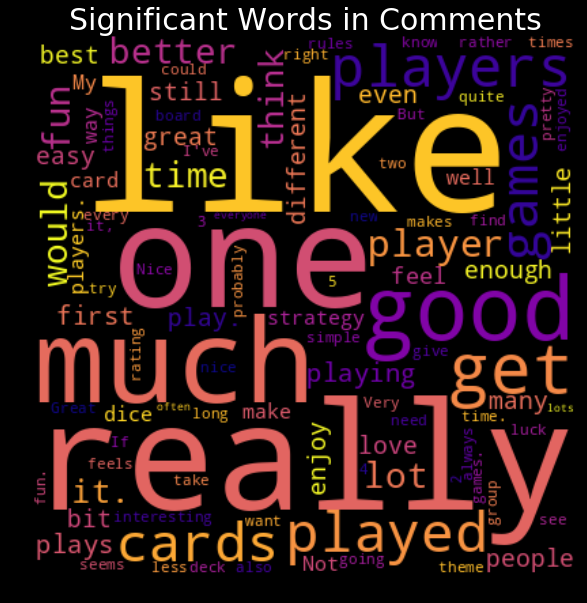

In [4]:


remove_words = ['game', 'game.', 'game,', 'I', 'it', '_', "I'd", 'The', '-', 'This', 'It', 'A', "It's", "I'm" , 'play']
sw = set(stopwords.words('english') + remove_words)

words = Counter([w for w in " ".join(df.comment).split() if w not in sw])

wc = WordCloud(width=400, height=400,colormap='plasma').generate_from_frequencies(dict(words.most_common(100)))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Significant Words in Comments', fontsize=30)
plt.axis('off');

In [3]:
wdf = pd.read_sql_table('sig_word', engine)
wdf.head()

,id,word,count,median,median_grouped,median_high,median_low,mode,mean,stdev,pstdev,variance,pvariance
0,1,++++,1,9.0,9.0,9.0,9.0,9.0,9.0,None,None,NaN,0.0
1,2,Thematic,2,8.0,9.0,9.0,7.0,NaN,8.0,None,None,2.0,1.0
2,3,+++,1,9.0,9.0,9.0,9.0,9.0,9.0,None,None,NaN,0.0
3,4,Bluff,1,8.0,9.0,9.0,7.0,NaN,8.0,None,None,2.0,1.0
4,5,Many,6,9.0,9.0,9.0,8.0,NaN,8.0,None,None,1.0,1.0


Comment length mean:  227.81582054309328
Comment length min:   6
Comment length max:   7977


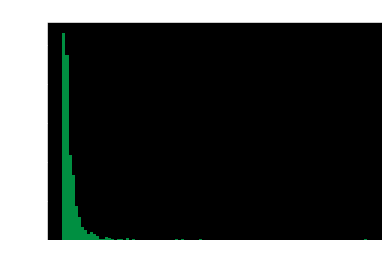

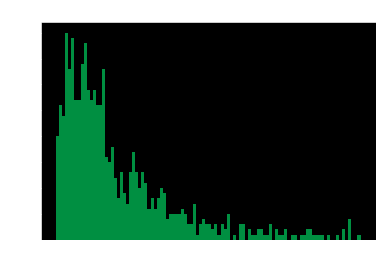

In [8]:
len_df = df.comment.str.len()

print('Comment length mean: ', len_df.mean())
print('Comment length min:  ', len_df.min())
print('Comment length max:  ', len_df.max())

num_bins = 100

plt.hist(len_df, num_bins, facecolor=green)

plt.title('Comment length')
plt.xlabel('Length of comment')
plt.ylabel('Number of Reviews')
plt.show()

upper_comment_bound = np.percentile(len_df, [0, 97.5])[1]

plt.hist(len_df[len_df < upper_comment_bound].dropna(), num_bins, facecolor=green)

plt.title('Comment length (97.5 percentile)')
plt.xlabel('Length of comment')
plt.ylabel('Number of Reviews')
plt.show()

# GameID Column Analysis

Review count mean:  2.630434782608696
Review count min:   1
Review count max:   16


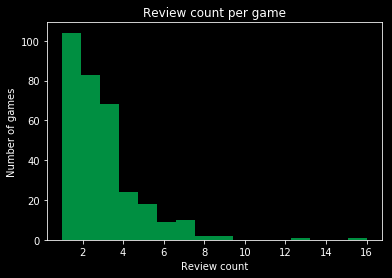

In [14]:
gameID_df = pd.DataFrame({'review_count': list(Counter(df.game_id).values()) })

print('Review count mean: ', gameID_df.review_count.mean())
print('Review count min:  ', gameID_df.review_count.min())
print('Review count max:  ', gameID_df.review_count.max())

plt.hist(gameID_df.review_count, gameID_df.review_count.max(), facecolor=green)
plt.title('Review count per game')
plt.xlabel('Review count')
plt.ylabel('Number of games')
plt.show()

# UserID Column Analysis

Review count mean:  1.0204819277108435
Review count min:   1
Review count max:   2


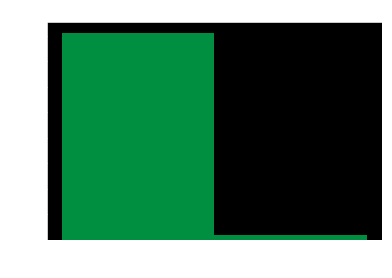

In [10]:
userID_df = pd.DataFrame({'review_count': list(Counter(df.userID).values())})

print('Review count mean: ', userID_df.review_count.mean())
print('Review count min:  ', userID_df.review_count.min())
print('Review count max:  ', userID_df.review_count.max())

plt.hist(userID_df.review_count, userID_df.review_count.max(), facecolor=green)
plt.title('Number of user Reviews')
plt.xlabel('Number of users')
plt.xticks(range(userID_df.review_count.min(), userID_df.review_count.max() + 1))
plt.ylabel('Review count')
plt.show()

# Comment x Rating Analysis

In [11]:
num_bins = 40


d = pd.cut(df.rating, 20)


Interval(8.65, 9.1, closed='right')